In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 불러오기 (인코딩은 Windows 기준 cp949로 설정)
df = pd.read_csv('kbo_21_24_merged.csv', encoding='cp949')

# 수치형 데이터만 추출
numeric_df = df.select_dtypes(include=[np.number])

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')

In [13]:
import numpy as np

# 수치형 변수만 선택
numeric_df = df.select_dtypes(include=[np.number])

# 수치형 변수 개수 출력
print(f"수치형 변수 개수: {numeric_df.shape[1]}개")

# 수치형 변수 목록 출력 (선택적으로)
print("수치형 변수 목록:")
print(numeric_df.columns.tolist())


수치형 변수 개수: 44개
수치형 변수 목록:
['연도', '순위', 'AVG', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SAC', 'SF', 'BB', 'IBB', 'HBP', 'SO', 'GDP', 'SLG', 'OBP', 'OPS', 'MH', 'RISP', 'PH-BA', 'XBH', 'GO', 'AO', 'GO/AO', 'GW RBI', 'BB/K', 'P/PA', 'ISOP', 'XR', 'GPA', '팀순위', '경기수', '팀승수', '팀패수', '팀무승부수', '팀승률', '팀게임차', '출생연도']


### [1] 주요 변수에 대한 scatter plot

#### 여러가지 변수 조합에 대해 실행

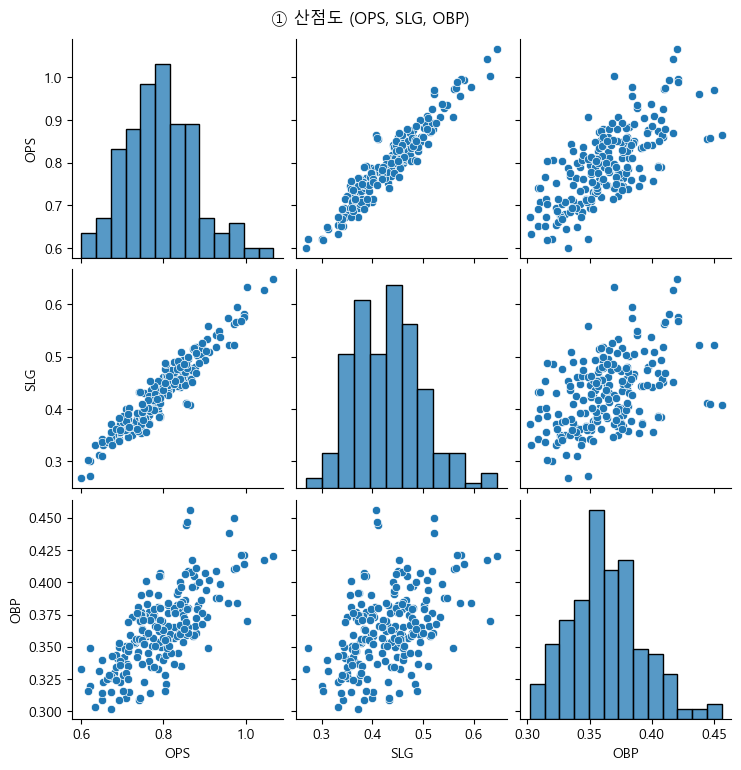

In [6]:
# OPS, SLG, OBP 간 관계 확인
sns.pairplot(numeric_df[['OPS', 'SLG', 'OBP']])
plt.suptitle("① 산점도 (OPS, SLG, OBP)", y=1.02)
plt.show()


#### 이론기반 변수 선택한 산점도

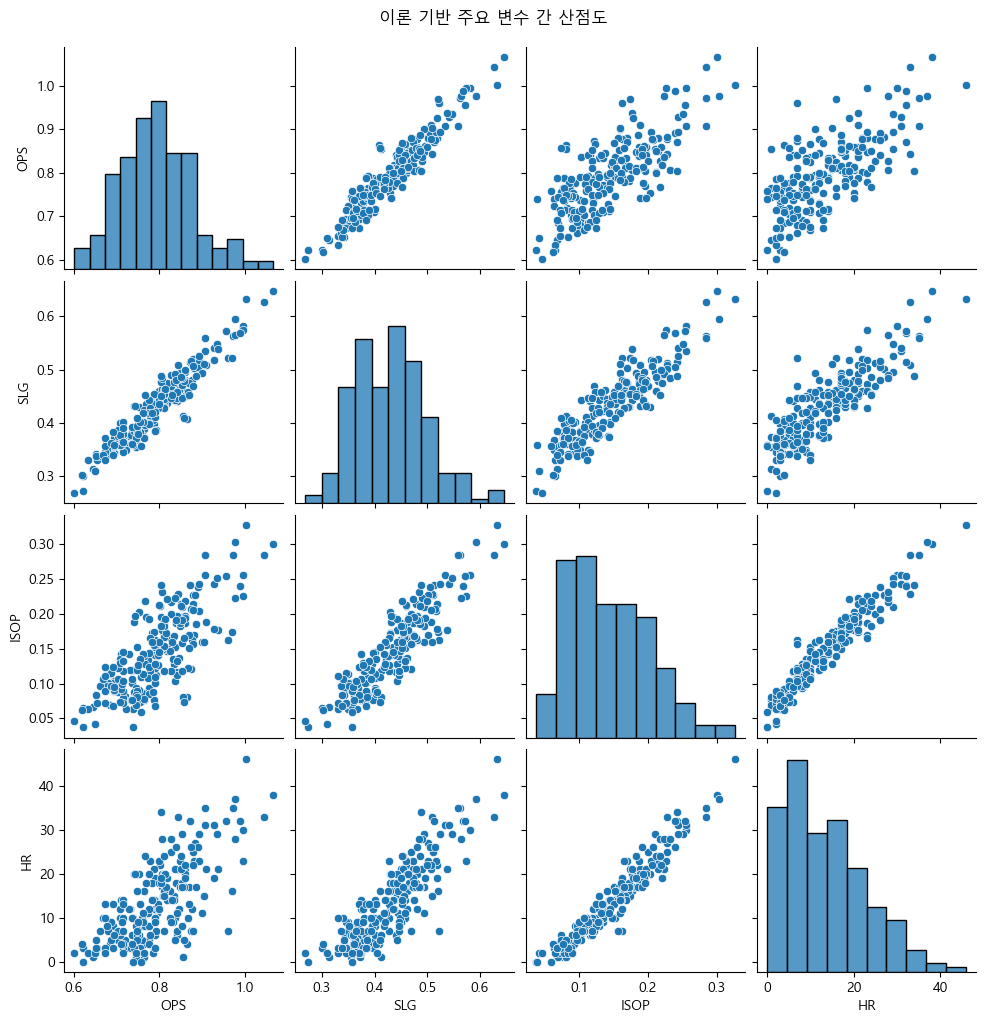

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 주요 변수 리스트 (이론 기반 선택)
selected_vars = ['OPS', 'SLG', 'ISOP', 'HR']

# 산점도 그리기
sns.pairplot(df[selected_vars])
plt.suptitle("이론 기반 주요 변수 간 산점도", y=1.02)
plt.show()


### 상관계수 행렬 계산 및 시각화

#### 팀 순위에 대한 상관계수 출력해보기

In [12]:
# 상관계수 계산
correlation_matrix = numeric_df.corr()

# 일부 예시 상관계수 출력
print("② 상관계수 일부 (OPS 관련):")
correlation_matrix[['팀순위']].sort_values(by='팀순위', ascending=False)


② 상관계수 일부 (OPS 관련):


,팀순위
팀순위,1.000000
팀패수,0.915911
팀게임차,0.876004
GDP,0.130192
출생연도,0.122489
SO,0.090607
GO/AO,0.074185
순위,0.070150
팀무승부수,0.048457
IBB,0.048302


#### 히트맵

c:\Users\chica\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


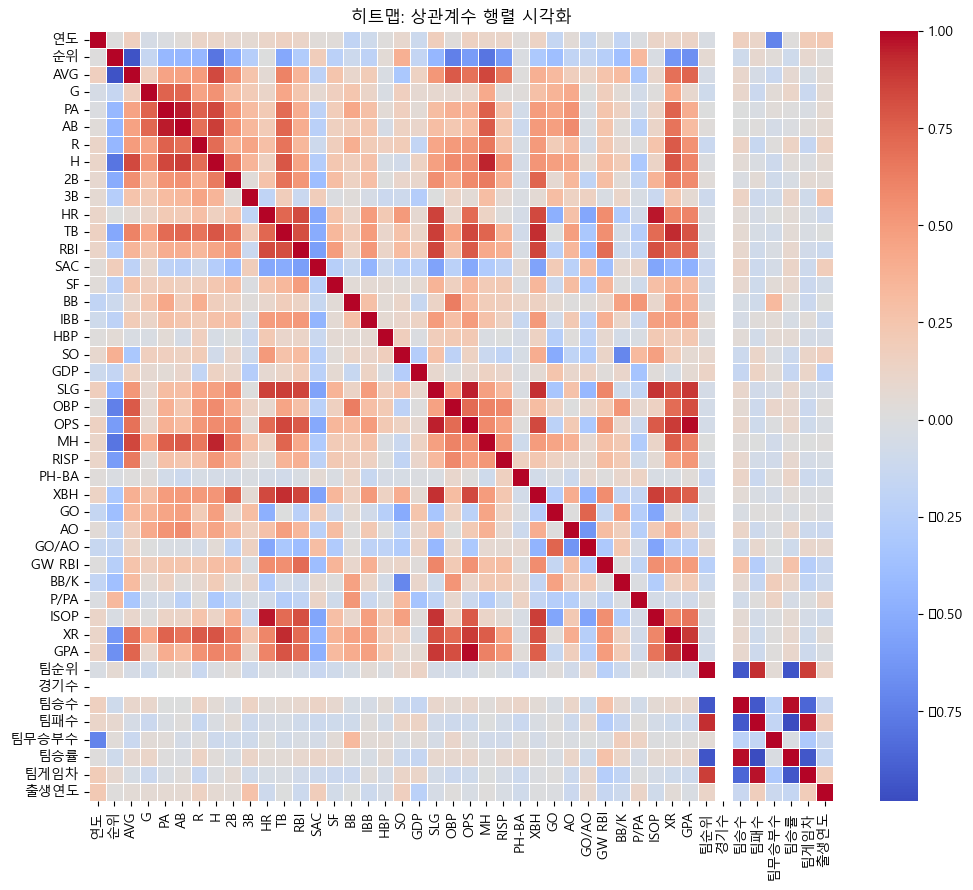

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("히트맵: 상관계수 행렬 시각화")
plt.show()

#### 팀순위에 대한 변수들 상관계수 시각화

c:\Users\chica\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
C:\Users\chica\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


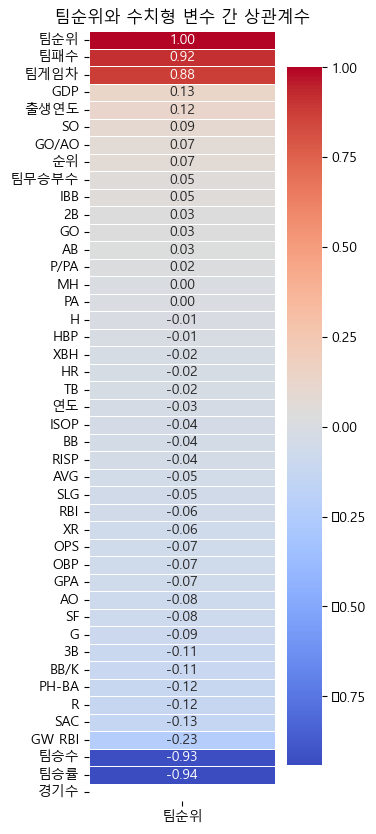

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 팀순위 기준 상관계수만 추출
teamrank_corr = correlation_matrix[['팀순위']].sort_values(by='팀순위', ascending=False)

# 히트맵으로 시각화 (세로 막대 1개)
plt.figure(figsize=(3, 10))  # 가로폭 줄이고 세로길이 확보
sns.heatmap(teamrank_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("팀순위와 수치형 변수 간 상관계수")
plt.show()
